# Logistic Regression
> Predict aircraft damage based on columns and see which columns affect it more

### Import libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [18]:
aviation = pd.read_csv('../Data/AviationFinal.csv')

#### Encode categorical values 

In [19]:
# Use Get dummies to encode categorical values 
weatherCondition = pd.get_dummies(aviation["WeatherCondition"], prefix_sep='_', drop_first=True)
phase = pd.get_dummies(aviation["BroadPhaseOfFlight"], prefix_sep='_', drop_first=True)
aircraftDamage = pd.get_dummies(aviation["AircraftDamage"], prefix_sep='_', drop_first=True)
investigationType = pd.get_dummies(aviation["InvestigationType"], prefix_sep='_', drop_first=True)
purposeOfFlight = pd.get_dummies(aviation["PurposeOfFlight"], prefix_sep='_', drop_first=True)
engineType = pd.get_dummies(aviation["EngineType"], prefix_sep='_', drop_first=True)

#### Combine all columns to predict aircraft damage and split into test and train

In [20]:
weatherCondition.reset_index(drop=True, inplace=True)
phase.reset_index(drop=True, inplace=True)
investigationType.reset_index(drop=True, inplace=True)
purposeOfFlight.reset_index(drop=True, inplace=True)
engineType.reset_index(drop=True, inplace=True)

train = pd.concat([weatherCondition,phase,investigationType,purposeOfFlight, engineType],axis=1)
train_y = aviation["AircraftDamage"]
X_train, X_test, y_train, y_test = train_test_split(train, train_y, test_size=0.30)

#### Fit into logistic regression model

In [21]:
logreg = LogisticRegression(solver='lbfgs', max_iter = 2828, multi_class="multinomial")
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2828,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Print accuracy scores

In [22]:
predictions = logreg.predict(X_test)
print(classification_report(y_test,predictions))
score = logreg.score(X_test, y_test)
print(score)

              precision    recall  f1-score   support

   Destroyed       0.62      0.22      0.32      5192
       Minor       0.64      0.56      0.60       743
 Substantial       0.79      0.96      0.86     17092
     Unknown       0.53      0.31      0.39       716

    accuracy                           0.77     23743
   macro avg       0.64      0.51      0.54     23743
weighted avg       0.74      0.77      0.72     23743

0.7651939519016131


### Recursive Feature Elimination with Cross-validation
> To find out the rankings of columns and optimal number of columns. 

Optimal number of features : 21


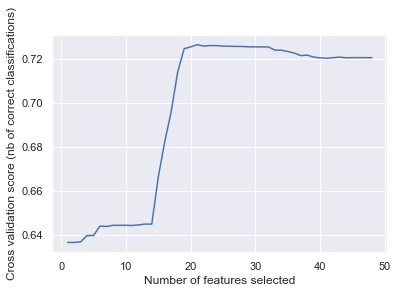

In [23]:
rfecv = RFECV(estimator=logreg, step=1, scoring='f1_weighted', cv = StratifiedKFold(10))
rfecv.fit(train, train_y)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Drop non-important columns

In [24]:
print(np.where(rfecv.support_ == False)[0])
# train.drop(train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace = True)
X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace = True)
X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace = True)

[ 0  2  3  5  7 10 12 14 15 17 18 19 21 22 23 25 27 28 29 35 37 38 39 40
 42 45 46]


In [25]:
print(X_train.columns)
print(X_test.columns)

Index(['VMC', 'DESCENT', 'LANDING', 'OTHER', 'STANDING', 'TAXI', 'Incident',
       'Air Race/Show', 'External Load', 'Glider Tow', 'Other Work Use',
       'Public Aircraft - Federal', 'Public Aircraft - Local',
       'Public Aircraft - State', 'Skydiving', 'Unknown', 'None', 'TF, TJ',
       'Turbo Fan', 'Turbo Jet', 'Unknown'],
      dtype='object')
Index(['VMC', 'DESCENT', 'LANDING', 'OTHER', 'STANDING', 'TAXI', 'Incident',
       'Air Race/Show', 'External Load', 'Glider Tow', 'Other Work Use',
       'Public Aircraft - Federal', 'Public Aircraft - Local',
       'Public Aircraft - State', 'Skydiving', 'Unknown', 'None', 'TF, TJ',
       'Turbo Fan', 'Turbo Jet', 'Unknown'],
      dtype='object')


#### Fit into logistic regression again with important columns

In [26]:
logRegv2 = LogisticRegression(solver='lbfgs', max_iter = 2828, multi_class="multinomial")
logRegv2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2828,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Print prediction scores 

In [27]:
prediction = logRegv2.predict(X_test)
print(classification_report(y_test,prediction))

score = logRegv2.score(X_test, y_test)
print(score)

              precision    recall  f1-score   support

   Destroyed       0.60      0.24      0.34      5192
       Minor       0.65      0.49      0.56       743
 Substantial       0.79      0.95      0.86     17092
     Unknown       0.52      0.36      0.42       716

    accuracy                           0.77     23743
   macro avg       0.64      0.51      0.55     23743
weighted avg       0.74      0.77      0.73     23743

0.7655308933159247
